## 1.Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## 2.Loading and Inspecting the Data

In [18]:
df = pd.read_csv('Mall_Customers.csv')

print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

## 3.Performing EDA and Visualization

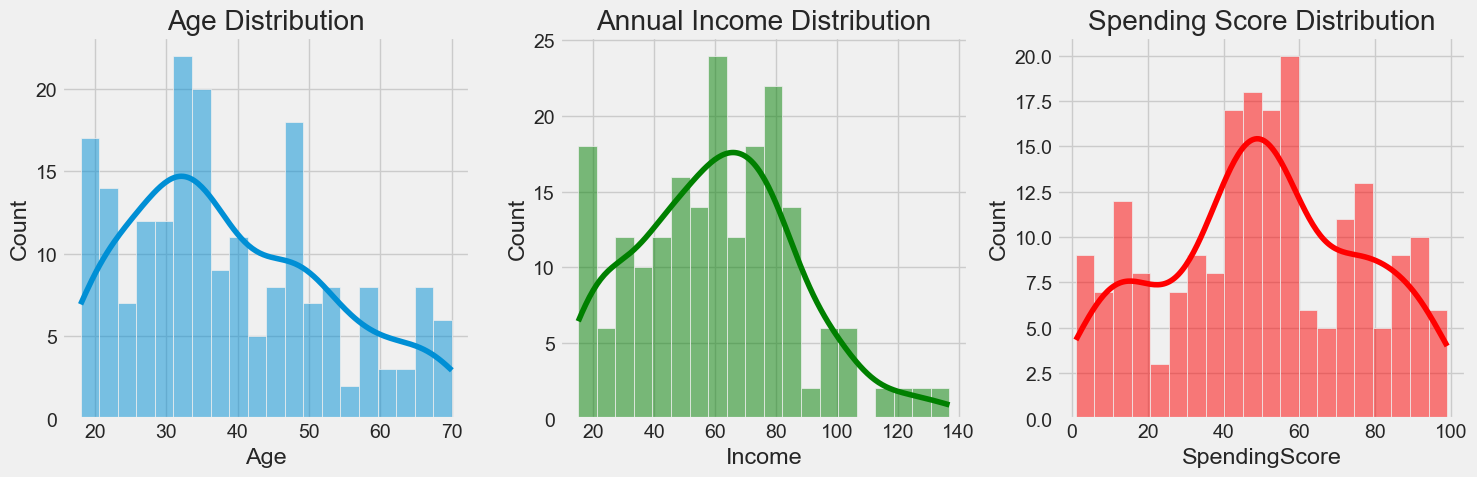

In [19]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Income'], bins=20, kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SpendingScore'], bins=20, kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

## 4.Data Preprocessing

In [20]:
#Select_the_features
X = df[['Income', 'SpendingScore']]

#Scale_the_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5.Find the Optimal Number of Clusters (The Elbow Method)

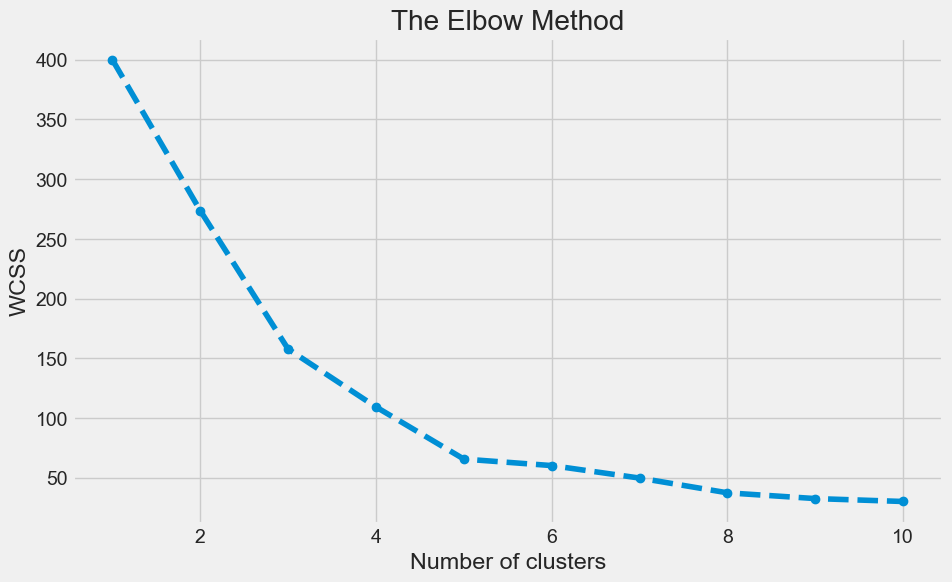

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6.Build and Apply the K-Means Model

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels

## 7.Visualize and Interpret the Clusters

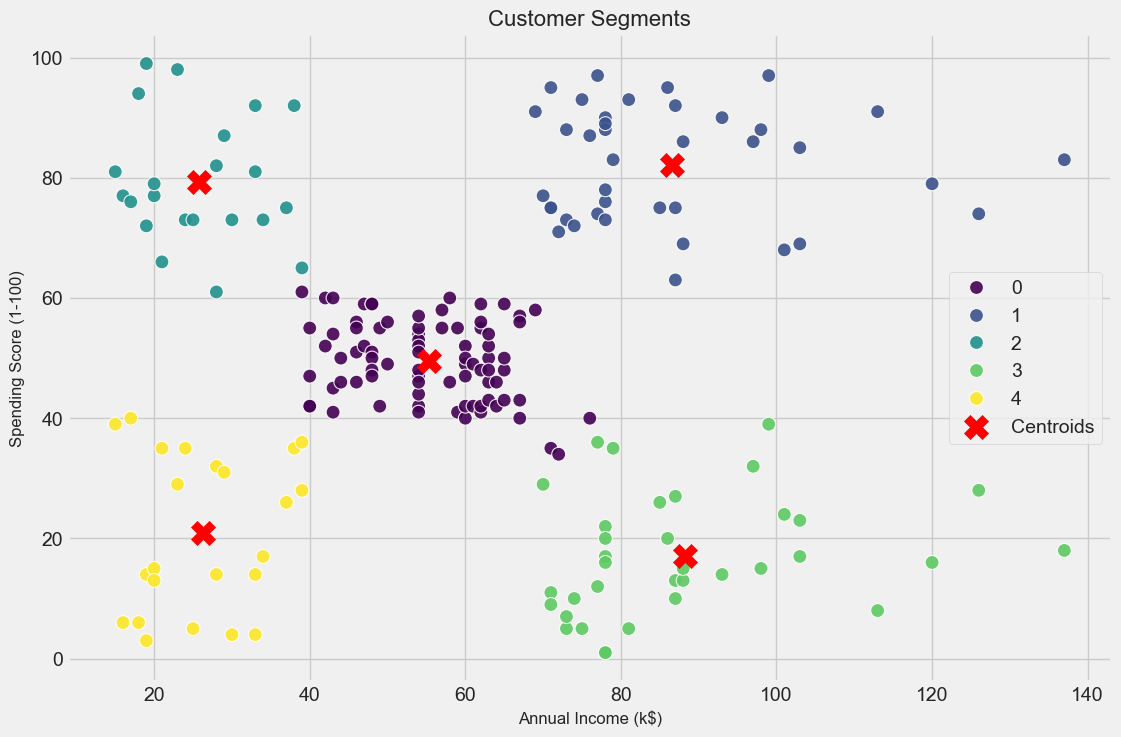

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.9)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()

plt.savefig('cluster_plot.png', dpi=300, bbox_inches='tight')
# -------------------

plt.show()

## 8.Analyze the Clusters

In [24]:
# Analyze the characteristics of each cluster
print(df.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'SpendingScore': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}))

               Age     Income  SpendingScore  NumCustomers
Cluster                                                   
0        42.716049  55.296296      49.518519            81
1        32.692308  86.538462      82.128205            39
2        25.272727  25.727273      79.363636            22
3        41.114286  88.200000      17.114286            35
4        45.217391  26.304348      20.913043            23
